Red Wine Quality Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [7]:
df['quality']=df['quality'].astype(float)
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [8]:
df['quality'].unique()

array([5., 6., 7., 4., 8., 3.])

In [9]:
f_df=df[df['quality']>=7]
f_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7.0
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7.0
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7.0
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7.0
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7.0
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8.0
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7.0


In [10]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 7 to 1584
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         217 non-null    float64
 1   volatile acidity      217 non-null    float64
 2   citric acid           217 non-null    float64
 3   residual sugar        217 non-null    float64
 4   chlorides             217 non-null    float64
 5   free sulfur dioxide   217 non-null    float64
 6   total sulfur dioxide  217 non-null    float64
 7   density               217 non-null    float64
 8   pH                    217 non-null    float64
 9   sulphates             217 non-null    float64
 10  alcohol               217 non-null    float64
 11  quality               217 non-null    float64
dtypes: float64(12)
memory usage: 22.0 KB


In [11]:
f_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000


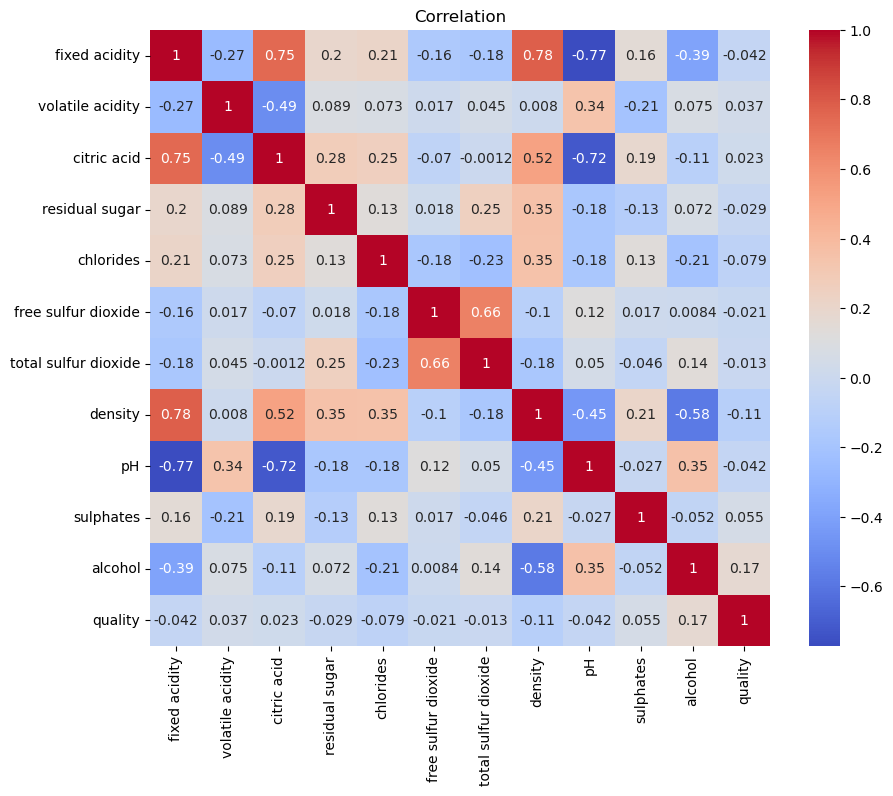

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(f_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

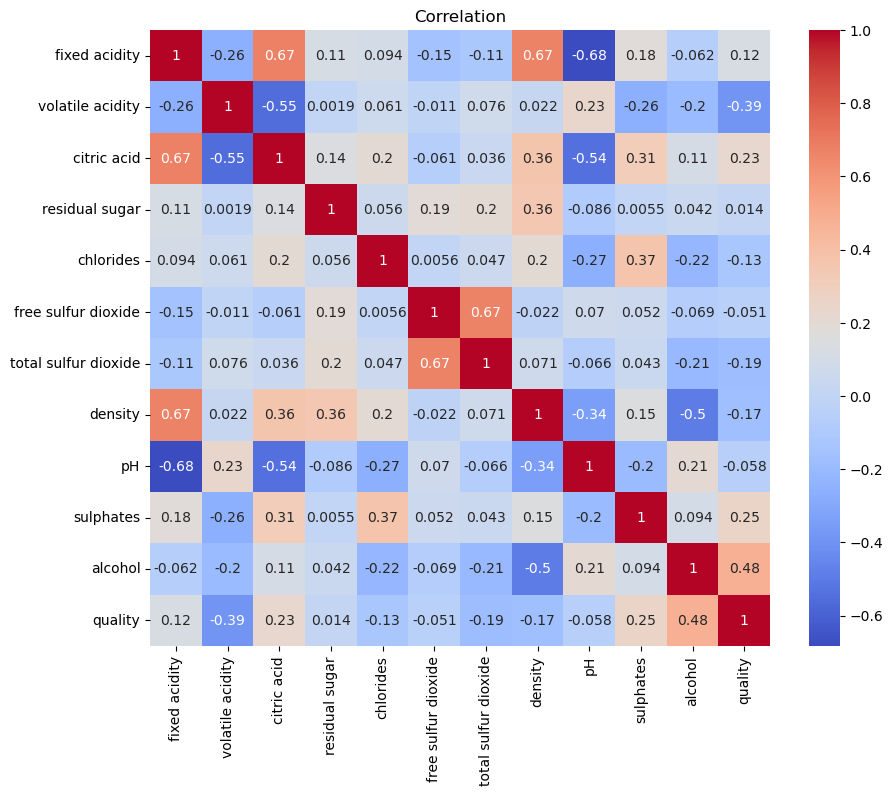

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

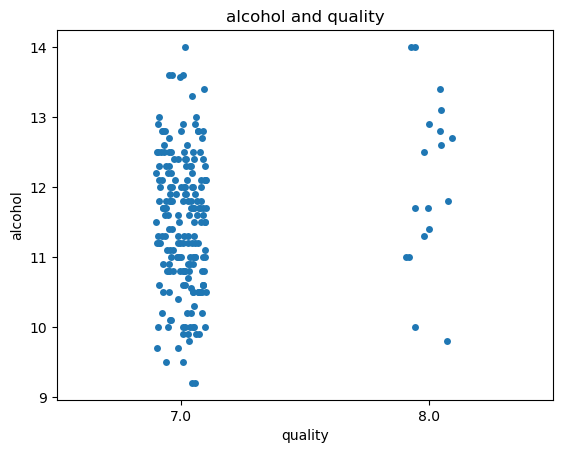

In [14]:
plt.title('alcohol and quality')
sns.stripplot(x='quality',y='alcohol',data=f_df)
plt.show()

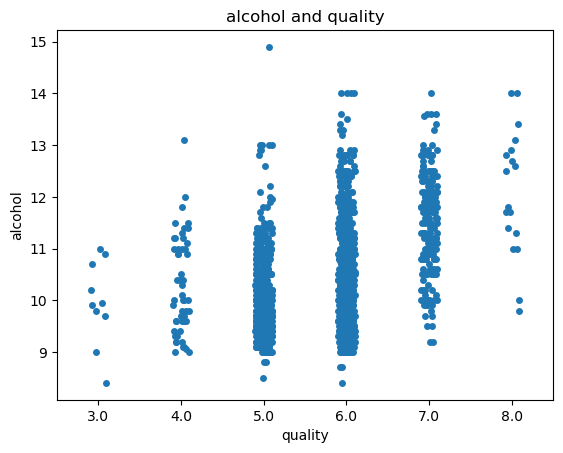

In [15]:
plt.title('alcohol and quality')
sns.stripplot(x='quality',y='alcohol',data=df)
plt.show()

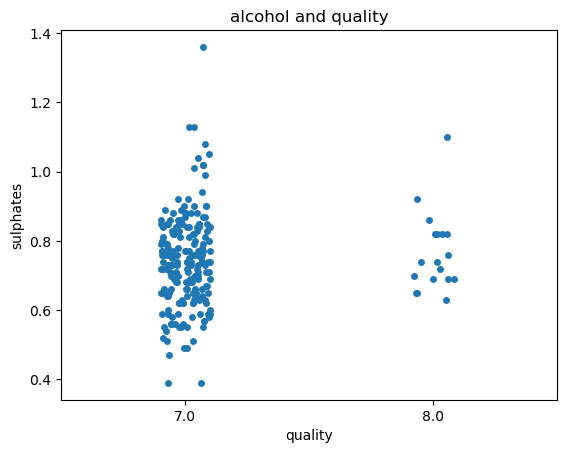

In [16]:
plt.title('alcohol and quality')
sns.stripplot(x='quality',y='sulphates',data=f_df)
plt.show()

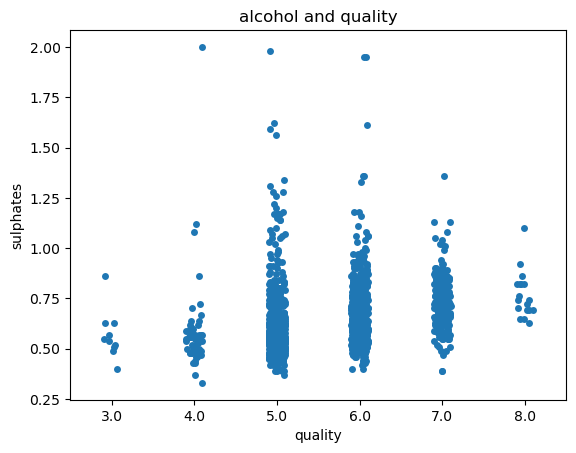

In [17]:
plt.title('alcohol and quality')
sns.stripplot(x='quality',y='sulphates',data=df)
plt.show()

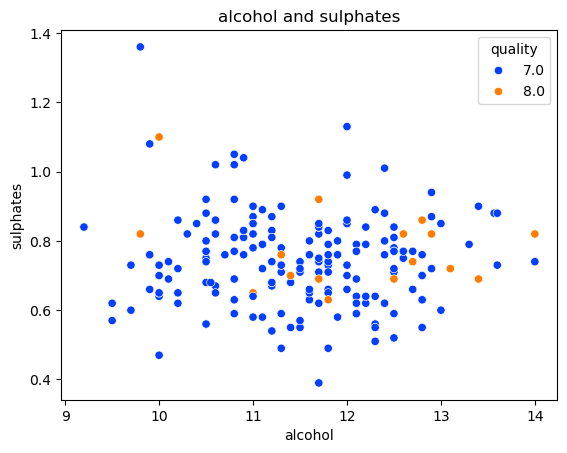

In [18]:
plt.title('alcohol and sulphates')
sns.scatterplot(x='alcohol',y='sulphates',data=f_df,hue='quality',palette='bright')
plt.show()

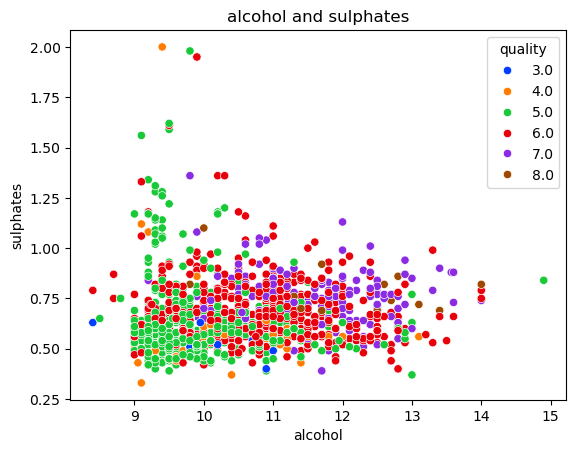

In [19]:
plt.title('alcohol and sulphates')
sns.scatterplot(x='alcohol',y='sulphates',data=df,hue='quality',palette='bright')
plt.show()

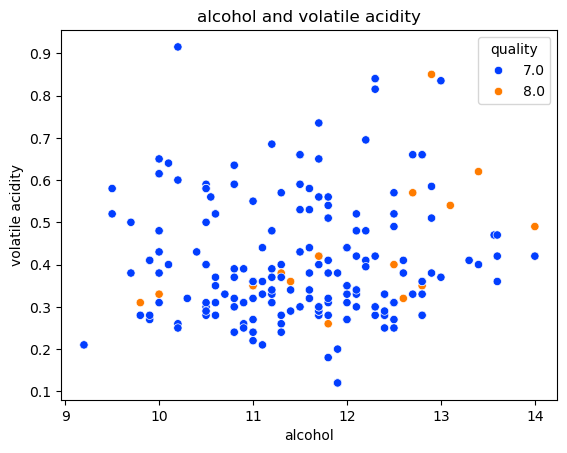

In [20]:
plt.title('alcohol and volatile acidity')
sns.scatterplot(x='alcohol',y='volatile acidity',data=f_df,hue='quality',palette='bright')
plt.show()

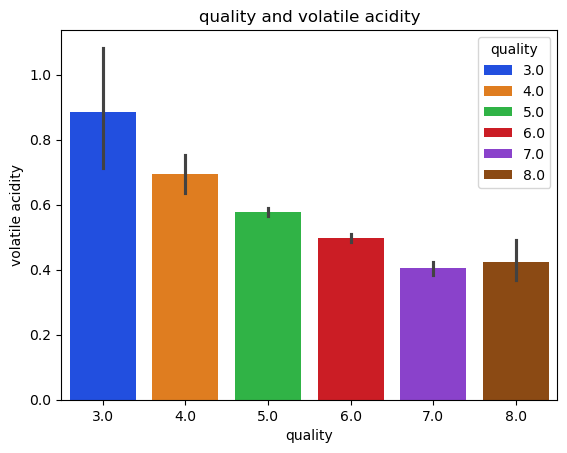

In [21]:
plt.title('quality and volatile acidity')
sns.barplot(x='quality',y='volatile acidity',data=df,hue='quality',palette='bright')
plt.show()

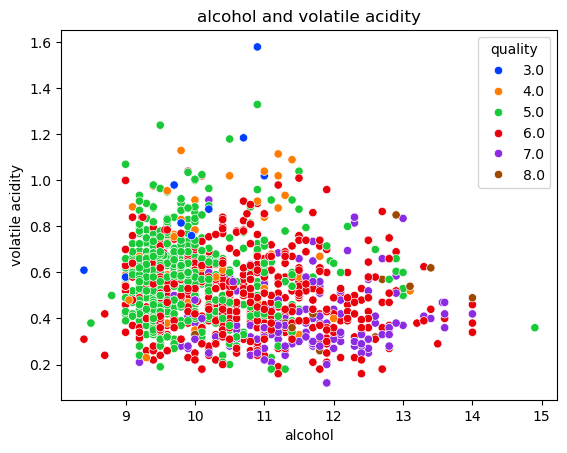

In [22]:
plt.title('alcohol and volatile acidity')
sns.scatterplot(x='alcohol',y='volatile acidity',data=df,hue='quality',palette='bright')
plt.show()

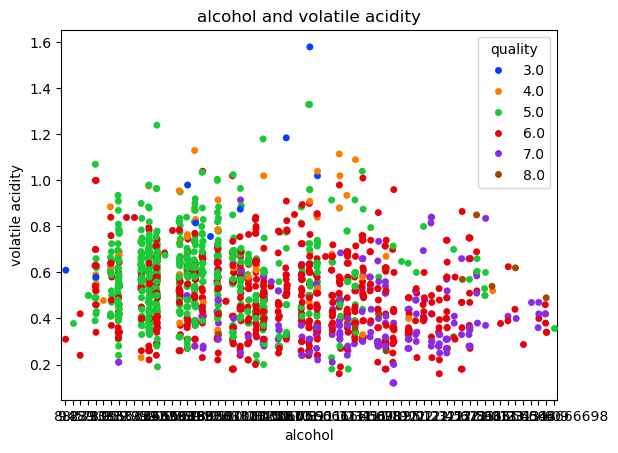

In [23]:
plt.title('alcohol and volatile acidity')
sns.stripplot(x='alcohol',y='volatile acidity',data=df,hue='quality',palette='bright')
plt.show()

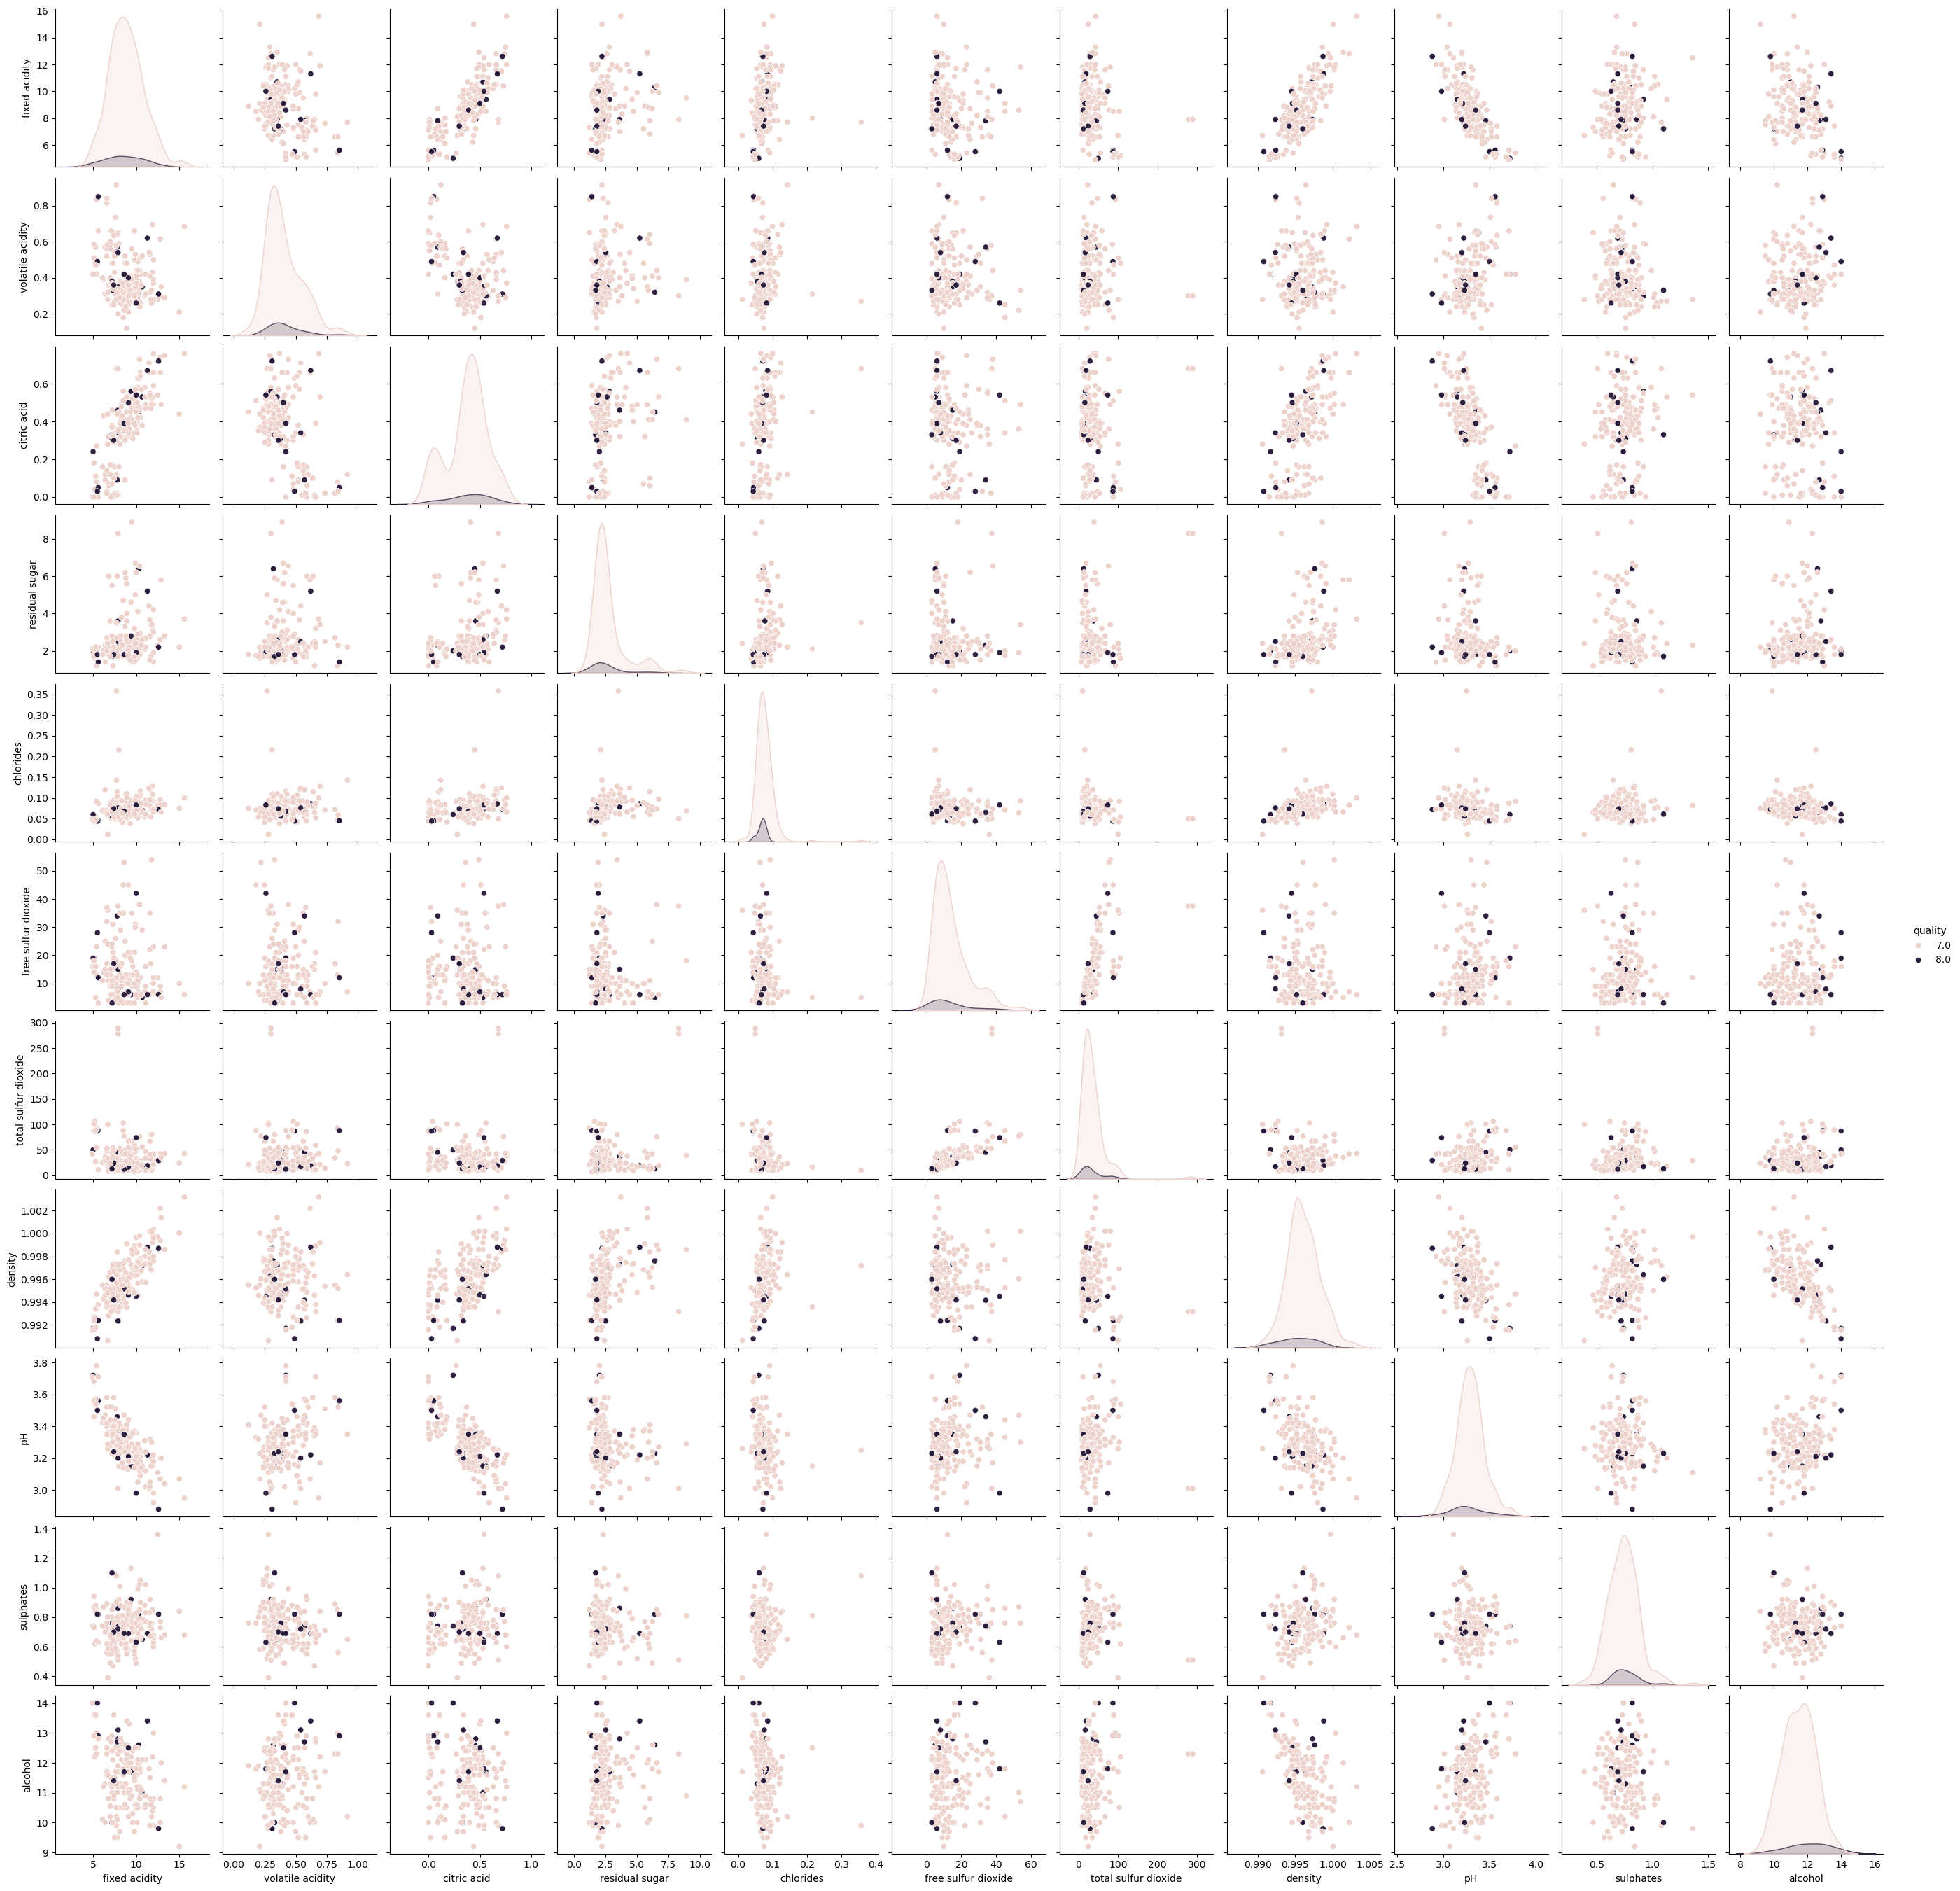

In [24]:
sns.pairplot(f_df,hue='quality')
plt.show()

In [25]:
df["Passed"]=df['quality'].apply(lambda x:1 if x>=7 else 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Passed
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0,0


In [26]:
x=df.drop(['quality','Passed'],axis=1)
y=df['Passed']

In [27]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=108)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
WineCheck=RandomForestClassifier(random_state=108)

In [32]:
WineCheck.fit(x_train,y_train)

RandomForestClassifier(random_state=108)

In [33]:
p=WineCheck.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score,classification_report

In [35]:
print(accuracy_score(y_test,p))
print(classification_report(y_test,p))

0.91875
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       417
           1       0.85      0.46      0.60        63

    accuracy                           0.92       480
   macro avg       0.89      0.72      0.78       480
weighted avg       0.91      0.92      0.91       480



In [36]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_s=s.fit_transform(x_train)
xt_s=s.transform(x_test)

In [37]:
winecheck=RandomForestClassifier(random_state=108)
winecheck.fit(x_s,y_train)

RandomForestClassifier(random_state=108)

In [38]:
pr=winecheck.predict(xt_s)

In [39]:
print(accuracy_score(y_test,pr))
print(classification_report(y_test,pr))

0.9208333333333333
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       417
           1       0.88      0.46      0.60        63

    accuracy                           0.92       480
   macro avg       0.90      0.73      0.78       480
weighted avg       0.92      0.92      0.91       480

